In [1]:
cd /home/blansdel/projects/mabe/mabetask1/

/home/blansdel/projects/mabe/mabetask1


In [2]:
pwd

'/home/blansdel/projects/mabe/mabetask1'

# Data to load from snapshots:

* config.json
* best_val_pred_probs
* best_val_preds 
* best_val_labels
* the analysis object... from which I can get the log directory...?

* really, I would want also the training labels and predictions

# Data from the ray_results:

* checkpoints
* events (for tensorboard)
* progress.json
* Not sure I need 
* Is that it?

So mainly the data from snapshots is what I want...

Can plot:

For each of the runs I do (e.g. LSTM full, random, LSTM full BO, etc):

* histogram of model validation performance
* training curves for best performing model 
* confusion matrices for best model 

Correlation matrix between predictions of different methods

Separate notebooks:

* EDA of the training data
* HMM and post-training optimizations

In [5]:
path = '/home/blansdel/projects/mabe/mabetask1/snapshots/'

In [14]:
import numpy as np
import os
import os.path

import matplotlib.pyplot as plt
import pandas as pd
import pickle 
from matplotlib import rc

import json

from mabetask1.lib.config import *
from mabetask1.lib.utils import animate_pose_sequence, plot_annotation_strip, num_to_text

In [17]:
train = np.load('data/train.npy',allow_pickle=True).item()
test = np.load('data/test.npy',allow_pickle=True).item()
sample_submission = np.load('data/sample_submission.npy',allow_pickle=True).item()

In [18]:
rc('animation', html='jshtml')

class_to_number = {s: i for i, s in enumerate(train['vocabulary'])}
number_to_class = {i: s for i, s in enumerate(train['vocabulary'])}

In [4]:
#Load in results files
fn_in = 'results/train_validation_features_distances_shifted_ml_rf_paramset_default.pkl'

with open(fn_in, 'rb') as handle:
    results = pickle.load(handle)


#Compute performance of model

#Make plot comparing preds

In [5]:
results.keys()

dict_keys(['pred_train', 'pred_val', 'X_train', 'y_train', 'groups_train', 'X_val', 'y_val', 'val_group'])

In [14]:
for k in results:
    exec(f"{k} = results['{k}']")

In [15]:
pred_train

array([3, 3, 3, ..., 3, 3, 3])

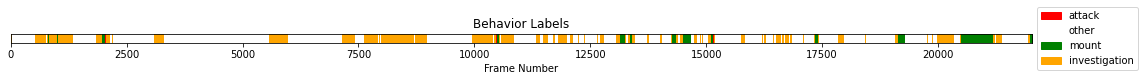

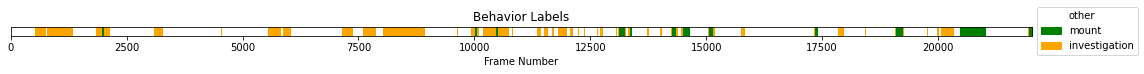

In [24]:
annotation_sequence = pred_val
text_sequence = num_to_text(annotation_sequence, number_to_class)
 
plot_annotation_strip(
    text_sequence,
    class_to_number,
    start_frame=0,
    stop_frame=int(len(annotation_sequence)/3) + 1000
)

annotation_sequence = y_val
text_sequence = num_to_text(annotation_sequence, number_to_class)
 
plot_annotation_strip(
    text_sequence,
    class_to_number,
    start_frame=0,
    stop_frame=int(len(annotation_sequence)/3) + 1000
)

## Summary of results

* Load analysis object

In [17]:
def load_run(run_name, path):

    run_dir = path + run_name + '/'
    val_pred_probs = np.load(run_dir + 'best_val_pred_probs.npy')
    val_pred = np.load(run_dir + 'best_val_preds.npy')

    analysis = None
    config = None 
    val_labels = None

    fname = run_dir + 'config.json'
    if os.path.isfile(fname):
        with open(fname) as json_file:
            config = json.load(json_file)

    fname = run_dir + 'analysis_object.pkl'
    if os.path.isfile(fname):
        with open(fname, 'rb') as handle:
            analysis = pickle.load(handle)

    return (val_pred, val_pred_probs, val_labels, analysis, config)        

In [18]:
run_name = 'lstm_test_run_bo'
val_pred, val_pred_probs, val_labels, analysis, config = load_run(run_name, path)

In [20]:
#Confusion matrix

In [21]:
#Extract best performance

In [22]:
#Get traces

In [24]:
#Load multiple results and plot correlations between predictions. Models that are diverse enough could be stacked for improvements